Trying every single function before compiling them in one class

In [3]:
import pickle

Network

In [4]:
def init_network():
    with open('sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    
    return network

In [1]:
%matplotlib inline



In [5]:
net = init_network()


In [6]:
import numpy as np

In [7]:
net

{'b2': array([-0.01471108, -0.07215131, -0.00155692,  0.12199665,  0.11603302,
        -0.00754946,  0.04085451, -0.08496164,  0.02898045,  0.0199724 ,
         0.19770803,  0.04365116, -0.06518728, -0.05226324,  0.0113163 ,
         0.03049979,  0.04060355,  0.0695399 , -0.07778469,  0.0692313 ,
        -0.09365533,  0.0548001 , -0.03843745,  0.02123107,  0.03793406,
        -0.02806267, -0.01818407,  0.06870425,  0.0542943 ,  0.0674368 ,
         0.06264312, -0.0233236 , -0.01589135,  0.01860516,  0.01839287,
        -0.01568104, -0.07422207, -0.01606729, -0.02262172, -0.01007509,
         0.0434415 , -0.12020151,  0.02802471, -0.07591944, -0.00533499,
        -0.08935217, -0.0181419 ,  0.0330689 , -0.01812706, -0.07689384,
        -0.02715412, -0.03847084, -0.05315471, -0.02153288,  0.06898243,
         0.02431128, -0.00333816,  0.00817491,  0.03911701, -0.02924617,
         0.07184725, -0.00356748,  0.02246175,  0.03987982, -0.04921926,
         0.02454282,  0.05875788,  0.08505439

Sigmoid

In [7]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

Softmax

In [8]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    return exp_a/np.sum(exp_a)

Predict

In [9]:
def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)

    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)

    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y

In [11]:
import matplotlib.pyplot as plt

MnistData class

In [12]:
"""
This is the mnist_data.py code here to use the MnistData class in the Mnist class 
"""
import numpy as np
import os
import pickle
import gzip
import urllib.request

class MnistData():

    image_dim = (28, 28)
    image_size = image_dim[0] * image_dim[1]
    dataset_dir = 'dataset'
    dataset_pkl = 'mnist.pkl'
    url_base = 'http://jrkwon.com/data/ece5831/mnist/'  #insted of the original link 'https://yann.lecun.com/exdb/mnist/'


    key_file = {
        'train_images': 'train-images-idx3-ubyte.gz',
        'train_labels': 'train-labels-idx1-ubyte.gz',
        'test_images': 't10k-images-idx3-ubyte.gz',
        'test_labels': 't10k-labels-idx1-ubyte.gz'
    }

    def __init__(self):
        self.dataset = {}
        self.dataset_pkl_path = f'{self.dataset_dir}/{self.dataset_pkl}'

        # create dataset_dir if the dir doesn't exist
        if os.path.exists(self.dataset_dir) is not True:
            os.mkdir(self.dataset_dir)

        self._init_dataset()

    def _change_one_hot_label(self, y, num_class):
        t = np.zeros((y.size, num_class))
        for idx, row in enumerate(t):
            row[y[idx]] = 1
        return t

    def _download(self, file_name):
        file_path = self.dataset_dir + '/' + file_name

        if os.path.exists(file_path):
            print(f'File: {file_name} already exists.')
            return

        print(f'Downloading {file_name}...')

        # to resolve 406 Not Acceptable error
        opener = urllib.request.build_opener()
        opener.addheaders = [('Accept', '')]
        urllib.request.install_opener(opener)

        urllib.request.urlretrieve(self.url_base + file_name, file_path)
        print('Done')

    def _download_all(self):
        for file_name in self.key_file.values():
            self._download(file_name)

    def _load_images(self, file_name):
        with gzip.open(file_name, 'rb') as f:
            images = np.frombuffer(f.read(), np.uint8, offset=16)
        images = images.reshape(-1, self.image_size) #The images are reshaped from their original 28x28 matrix format into a flattened 1D array of 784 bytes per image
        return images

    def _load_labels(self, file_name):
        with gzip.open(file_name, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
        return labels

    def _create_dataset(self):
        file_name = f"{self.dataset_dir}/{self.key_file['train_images']}"
        self.dataset['train_images'] = self._load_images(file_name)

        file_name = f"{self.dataset_dir}/{self.key_file['train_labels']}"
        self.dataset['train_labels'] = self._load_labels(file_name)

        file_name = f"{self.dataset_dir}/{self.key_file['test_images']}"
        self.dataset['test_images'] = self._load_images(file_name)

        file_name = f"{self.dataset_dir}/{self.key_file['test_labels']}"
        self.dataset['test_labels'] = self._load_labels(file_name)

        with open(f'{self.dataset_pkl_path}', 'wb') as f:
            print(f'Pickle: {self.dataset_pkl_path} is being created.')
            pickle.dump(self.dataset, f)
            print('Done.')

    def _init_dataset(self):
        self._download_all()
        if os.path.exists(f'{self.dataset_pkl_path}'):
            with open(f'{self.dataset_pkl_path}', 'rb') as f:
                print(f'Pickle: {self.dataset_pkl_path} already exists.')
                print('Loading...')
                self.dataset = pickle.load(f)
                print('Done.')
        else:
            self._create_dataset()

    def load(self):
        # normalize image datasets
        for key in ('train_images', 'test_images'):
            self.dataset[key] = self.dataset[key].astype(np.float32)
            self.dataset[key] /= 255.0

        # one-hot encoding
        for key in ('train_labels', 'test_labels'):
            self.dataset[key] = self._change_one_hot_label(self.dataset[key], 10)

        return (self.dataset['train_images'], self.dataset['train_labels']), \
               (self.dataset['test_images'], self.dataset['test_labels'])

    def get_original_labels(self, one_hot_label):
            return np.argmax(one_hot_label)
    
        

if __name__ == "__main__":
    print("MnistData class is to load MNIST datasets.")
    data = MnistData()
    (train_images, train_labels), (test_images, test_labels) = data.load()
    print("Data loaded successfully.")
    print(f"Train images shape: {train_images.shape}, Train labels shape: {train_labels.shape}")
    print(f"Test images shape: {test_images.shape}, Test labels shape: {test_labels.shape}")

MnistData class is to load MNIST datasets.
File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Data loaded successfully.
Train images shape: (60000, 784), Train labels shape: (60000, 10)
Test images shape: (10000, 784), Test labels shape: (10000, 10)


Using the load function of MnistData class

In [13]:
mnist_data = MnistData()
(_, _), (test_images, test_labels) = mnist_data.load()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.


Mnist class

In [14]:
import mnist_data
class Mnist():
    def __init__(self):
        self.data = mnist_data.MnistData()
        self.params = {}


    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))


    def softmax(self, a):
        c = np.max(a)
        exp_a = np.exp(a - c)
        return exp_a/np.sum(exp_a)
    

    def load(self):
        (x_train, y_train), (x_test, y_test) = self.data.load()
        return (x_train, y_train), (x_test, y_test)
    
    
    def init_network(self):
        with open('sample_weight.pkl', 'rb') as f:
            self.params = pickle.load(f)
    

    def predict(self, x):
        w1, w2, w3 = self.params['W1'], self.params['W2'], self.params['W3']
        b1, b2, b3 = self.params['b1'], self.params['b2'], self.params['b3']

        a1 = np.dot(x, w1) + b1
        z1 = self.sigmoid(a1)

        a2 = np.dot(z1, w2) + b2
        z2 = self.sigmoid(a2)

        a3 = np.dot(z2, w3) + b3
        y = self.softmax(a3)

        return y    


In [15]:
mnist = Mnist()
(_, _), (test_images, test_labels) = mnist.load()
mnist.init_network()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.


Trying the prediction function on a file from the dataset

In [16]:
""" 
Trying the prediction function on a file from the mnist dataset
 """
idx = 21
x = test_images[idx]
y = test_labels[idx]

In [17]:
y_hat = mnist.predict(x)

In [18]:
y_one_hot = np.argmax(y)
p = np.argmax(y_hat)

The image 21 is 6. The groud truth is 6.


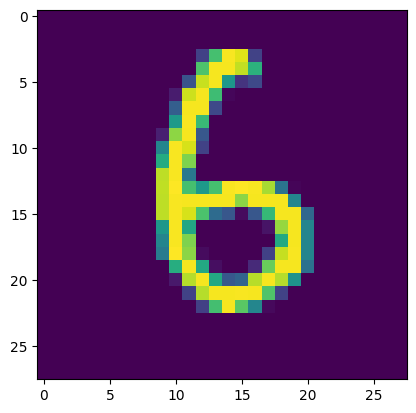

In [19]:
print(f'The image {idx} is {y_one_hot}. The groud truth is {p}.')
plt.imshow(x.reshape(28, 28))

Now we will write a code to load and predict an image from my handwritten images

Only a test run

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.


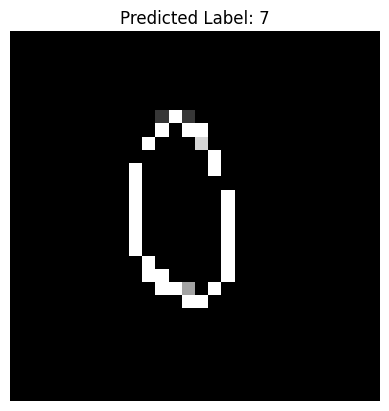

Fail: Image ./Custom MNIST Samples/Digit 0/0_3.png is for digit 0 but the inference result is 7.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mnist import Mnist 
from mnist_data import MnistData 

# Assuming Mnist and MnistData classes are defined and initialized
mnist = Mnist()
mnist.init_network()  # Make sure the network is initialized with weights

def load_and_predict_image(image_path):
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Check if the image loaded successfully
    if img is None:
        print(f"Error: Could not load image from path {image_path}")
        return None

    # Resize the image to 28x28 if it isn't already
    if img.shape != (28, 28):
        img = cv2.resize(img, (28, 28))
    
    # Normalize and flatten the image
    img = img.astype(np.float32)
    img /= 255.0
    img = img.reshape(-1)  # Flatten to match the input shape

    # Predict using the initialized Mnist network
    prediction = mnist.predict(img)
    predicted_label = np.argmax(prediction)

    # Display the image using matplotlib for Jupyter compatibility
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f"Predicted Label: {predicted_label}")
    plt.axis('off')
    plt.show()  # Display inline in Jupyter

    return predicted_label

def predict_and_display(image_filename, expected_digit):
    # Predict the label for the input image
    predicted_label = load_and_predict_image(image_filename)
    
    if predicted_label is None:
        print("Prediction failed due to an image loading error.")
        return

    # Check if the prediction matches the expected digit
    if predicted_label == expected_digit:
        print(f"Success: Image {image_filename} is for digit {expected_digit} and is recognized as {predicted_label}.")
    else:
        print(f"Fail: Image {image_filename} is for digit {expected_digit} but the inference result is {predicted_label}.")

# Set the image path and expected digit here
image_filename = "./Custom MNIST Samples/Digit 0/0_3.png"  # Replace with the path to your image
expected_digit = 0  # Set the expected digit

# Run the prediction
predict_and_display(image_filename, expected_digit)


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.


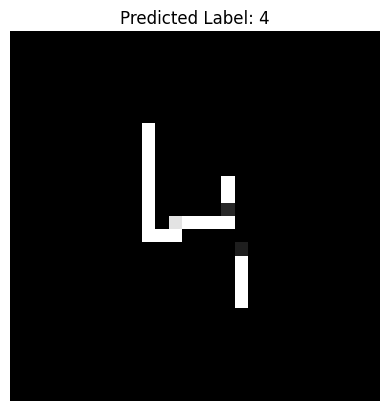

Success: Image ./Custom MNIST Samples/Digit 4/4_3.png is for digit 4 and is recognized as 4.


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mnist import Mnist 
from mnist_data import MnistData 

# Assuming Mnist and MnistData classes are defined and initialized
mnist = Mnist()
mnist.init_network()  # Make sure the network is initialized with weights

def load_and_predict_image(image_path):
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Check if the image loaded successfully
    if img is None:
        print(f"Error: Could not load image from path {image_path}")
        return None

    # Resize the image to 28x28 if it isn't already
    if img.shape != (28, 28):
        img = cv2.resize(img, (28, 28))
    
    # Normalize and flatten the image
    img = img.astype(np.float32)
    img /= 255.0
    img = img.reshape(-1)  # Flatten to match the input shape

    # Predict using the initialized Mnist network
    prediction = mnist.predict(img)
    predicted_label = np.argmax(prediction)

    # Display the image using matplotlib for Jupyter compatibility
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f"Predicted Label: {predicted_label}")
    plt.axis('off')
    plt.show()  # Display inline in Jupyter

    return predicted_label

def predict_and_display(image_filename, expected_digit):
    # Predict the label for the input image
    predicted_label = load_and_predict_image(image_filename)
    
    if predicted_label is None:
        print("Prediction failed due to an image loading error.")
        return

    # Check if the prediction matches the expected digit
    if predicted_label == expected_digit:
        print(f"Success: Image {image_filename} is for digit {expected_digit} and is recognized as {predicted_label}.")
    else:
        print(f"Fail: Image {image_filename} is for digit {expected_digit} but the inference result is {predicted_label}.")

# Set the image path and expected digit here
image_filename = "./Custom MNIST Samples/Digit 4/4_3.png"  # Replace with the path to your image
expected_digit = 4  # Set the expected digit

# Run the prediction
predict_and_display(image_filename, expected_digit)


The test run was successful and now we will test it on all our images 

In [ ]:

!python module5_3.py "./Custom MNIST Samples/Digit 0/0_0.png" 0


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 0/0_0.png is for digit 0 but the inference result is 5.


In [ ]:
""" 
I wrote the exact same code as module5_3.py above and it shows images but when i call it using !python 
it doesnt show images in jupyter notebook. 
i tried cv2.imshow()
plt.show()
and %matplotlib.inline, nothing worked 
 """


!python module5_3.py "./Custom MNIST Samples/Digit 0/0_1.png" 0


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 0/0_1.png is for digit 0 but the inference result is 2.


This doesnt show the image but when i run this same command - python module5_3.py "./Custom MNIST Samples/Digit 0/0_2.png" 0 in terminal, it shows image output

In [21]:

!python module5_3.py "./Custom MNIST Samples/Digit 0/0_2.png" 0


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 0/0_2.png is for digit 0 but the inference result is 7.


In [ ]:

!python module5_3.py "./Custom MNIST Samples/Digit 0/0_3.png" 0


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 0/0_3.png is for digit 0 but the inference result is 7.


In [24]:

!python module5_3.py "./Custom MNIST Samples/Digit 0/0_4.png" 0


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 0/0_4.png is for digit 0 but the inference result is 7.


In [25]:

!python module5_3.py "./Custom MNIST Samples/Digit 1/1_0.png" 1


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 1/1_0.png is for digit 1 but the inference result is 3.


In [21]:

!python module5_3.py "./Custom MNIST Samples/Digit 1/1_1.png" 1


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Success: Image ./Custom MNIST Samples/Digit 1/1_1.png is for digit 1 and is recognized as 1.
Figure(640x480)


In [9]:

!python module5_3.py "./Custom MNIST Samples/Digit 1/1_2.png" 1


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 1/1_2.png is for digit 1 but the inference result is 7.


In [10]:

!python module5_3.py "./Custom MNIST Samples/Digit 1/1_3.png" 1


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 1/1_3.png is for digit 1 but the inference result is 5.


In [11]:

!python module5_3.py "./Custom MNIST Samples/Digit 1/1_4.png" 1


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 1/1_4.png is for digit 1 but the inference result is 7.


In [12]:

!python module5_3.py "./Custom MNIST Samples/Digit 2/2_0.png" 2


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 2/2_0.png is for digit 2 but the inference result is 1.


In [13]:

!python module5_3.py "./Custom MNIST Samples/Digit 2/2_1.png" 2


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 2/2_1.png is for digit 2 but the inference result is 3.


In [14]:

!python module5_3.py "./Custom MNIST Samples/Digit 2/2_2.png" 2


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Success: Image ./Custom MNIST Samples/Digit 2/2_2.png is for digit 2 and is recognized as 2.


In [15]:

!python module5_3.py "./Custom MNIST Samples/Digit 2/2_3.png" 2


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Success: Image ./Custom MNIST Samples/Digit 2/2_3.png is for digit 2 and is recognized as 2.


In [16]:

!python module5_3.py "./Custom MNIST Samples/Digit 2/2_4.png" 2


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 2/2_4.png is for digit 2 but the inference result is 7.


In [17]:

!python module5_3.py "./Custom MNIST Samples/Digit 3/3_0.png" 3


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 3/3_0.png is for digit 3 but the inference result is 2.


In [18]:

!python module5_3.py "./Custom MNIST Samples/Digit 3/3_1.png" 3


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 3/3_1.png is for digit 3 but the inference result is 7.


In [19]:

!python module5_3.py "./Custom MNIST Samples/Digit 3/3_2.png" 3


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 3/3_2.png is for digit 3 but the inference result is 7.


In [20]:

!python module5_3.py "./Custom MNIST Samples/Digit 3/3_3.png" 3


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Success: Image ./Custom MNIST Samples/Digit 3/3_3.png is for digit 3 and is recognized as 3.


In [29]:

!python module5_3.py "./Custom MNIST Samples/Digit 3/3_4.png" 3


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 3/3_4.png is for digit 3 but the inference result is 2.


In [30]:

!python module5_3.py "./Custom MNIST Samples/Digit 4/4_0.png" 4


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 4/4_0.png is for digit 4 but the inference result is 9.


In [31]:

!python module5_3.py "./Custom MNIST Samples/Digit 4/4_1.png" 4



File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Success: Image ./Custom MNIST Samples/Digit 4/4_1.png is for digit 4 and is recognized as 4.


In [32]:

!python module5_3.py "./Custom MNIST Samples/Digit 4/4_2.png" 4


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Success: Image ./Custom MNIST Samples/Digit 4/4_2.png is for digit 4 and is recognized as 4.


In [33]:

!python module5_3.py "./Custom MNIST Samples/Digit 4/4_3.png" 4


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Success: Image ./Custom MNIST Samples/Digit 4/4_3.png is for digit 4 and is recognized as 4.


In [34]:

!python module5_3.py "./Custom MNIST Samples/Digit 4/4_4.png" 4


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Success: Image ./Custom MNIST Samples/Digit 4/4_4.png is for digit 4 and is recognized as 4.


In [35]:

!python module5_3.py "./Custom MNIST Samples/Digit 5/5_0.png" 5


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Success: Image ./Custom MNIST Samples/Digit 5/5_0.png is for digit 5 and is recognized as 5.


In [36]:

!python module5_3.py "./Custom MNIST Samples/Digit 5/5_1.png" 5


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Success: Image ./Custom MNIST Samples/Digit 5/5_1.png is for digit 5 and is recognized as 5.


In [37]:

!python module5_3.py "./Custom MNIST Samples/Digit 5/5_2.png" 5


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Success: Image ./Custom MNIST Samples/Digit 5/5_2.png is for digit 5 and is recognized as 5.


In [38]:

!python module5_3.py "./Custom MNIST Samples/Digit 5/5_3.png" 5


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 5/5_3.png is for digit 5 but the inference result is 7.


In [39]:

!python module5_3.py "./Custom MNIST Samples/Digit 5/5_4.png" 5


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Success: Image ./Custom MNIST Samples/Digit 5/5_4.png is for digit 5 and is recognized as 5.


In [40]:

!python module5_3.py "./Custom MNIST Samples/Digit 6/6_0.png" 6


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 6/6_0.png is for digit 6 but the inference result is 1.


In [41]:

!python module5_3.py "./Custom MNIST Samples/Digit 6/6_1.png" 6


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 6/6_1.png is for digit 6 but the inference result is 1.


In [42]:

!python module5_3.py "./Custom MNIST Samples/Digit 6/6_2.png" 6


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 6/6_2.png is for digit 6 but the inference result is 5.


In [43]:

!python module5_3.py "./Custom MNIST Samples/Digit 6/6_2.png" 6


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 6/6_2.png is for digit 6 but the inference result is 5.


In [44]:

!python module5_3.py "./Custom MNIST Samples/Digit 6/6_3.png" 6


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 6/6_3.png is for digit 6 but the inference result is 5.


In [45]:

!python module5_3.py "./Custom MNIST Samples/Digit 6/6_4.png" 6


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 6/6_4.png is for digit 6 but the inference result is 5.


In [46]:

!python module5_3.py "./Custom MNIST Samples/Digit 7/7_0.png" 7


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Success: Image ./Custom MNIST Samples/Digit 7/7_0.png is for digit 7 and is recognized as 7.


In [47]:

!python module5_3.py "./Custom MNIST Samples/Digit 7/7_1.png" 7


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 7/7_1.png is for digit 7 but the inference result is 3.


In [48]:

!python module5_3.py "./Custom MNIST Samples/Digit 7/7_2.png" 7


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 7/7_2.png is for digit 7 but the inference result is 3.


In [49]:

!python module5_3.py "./Custom MNIST Samples/Digit 7/7_3.png" 7


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Success: Image ./Custom MNIST Samples/Digit 7/7_3.png is for digit 7 and is recognized as 7.


In [50]:

!python module5_3.py "./Custom MNIST Samples/Digit 7/7_4.png" 7


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 7/7_4.png is for digit 7 but the inference result is 3.


In [51]:

!python module5_3.py "./Custom MNIST Samples/Digit 8/8_0.png" 8


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 8/8_0.png is for digit 8 but the inference result is 5.


In [52]:

!python module5_3.py "./Custom MNIST Samples/Digit 8/8_1.png" 8


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 8/8_1.png is for digit 8 but the inference result is 1.


In [53]:

!python module5_3.py "./Custom MNIST Samples/Digit 8/8_2.png" 8


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Success: Image ./Custom MNIST Samples/Digit 8/8_2.png is for digit 8 and is recognized as 8.


In [54]:

!python module5_3.py "./Custom MNIST Samples/Digit 8/8_3.png" 8


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 8/8_3.png is for digit 8 but the inference result is 1.


In [55]:

!python module5_3.py "./Custom MNIST Samples/Digit 8/8_4.png" 8


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 8/8_4.png is for digit 8 but the inference result is 1.


In [56]:

!python module5_3.py "./Custom MNIST Samples/Digit 9/9_0.png" 9


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 9/9_0.png is for digit 9 but the inference result is 7.


In [57]:

!python module5_3.py "./Custom MNIST Samples/Digit 9/9_1.png" 9


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 9/9_1.png is for digit 9 but the inference result is 1.


In [58]:

!python module5_3.py "./Custom MNIST Samples/Digit 9/9_2.png" 9


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 9/9_2.png is for digit 9 but the inference result is 4.


In [59]:

!python module5_3.py "./Custom MNIST Samples/Digit 9/9_3.png" 9


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 9/9_3.png is for digit 9 but the inference result is 3.


In [27]:

!python module5_3.py "./Custom MNIST Samples/Digit 9/9_4.png" 9


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.


Traceback (most recent call last):
  File "d:\UMD\Neural Networks\Assignment GIthub\ece5831-2024-assignments\05-3\module5_3.py", line 63, in <module>
    main()
  File "d:\UMD\Neural Networks\Assignment GIthub\ece5831-2024-assignments\05-3\module5_3.py", line 50, in main
    predicted_label = load_and_predict_image(args.image_filename)
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\UMD\Neural Networks\Assignment GIthub\ece5831-2024-assignments\05-3\module5_3.py", line 39, in load_and_predict_image
    plt.imshow()  
    ^^^^^^^^^^^^
TypeError: imshow() missing 1 required positional argument: 'X'
